# Setup

## Import Libraries

In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

import statsmodels.api as sm

In [21]:
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [22]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/mobility/data/scooters-and-weather.csv", index_col= 'Date', parse_dates= True)

In [ ]:
df.head()

,Count,Duration,Distance,WeekOfYear,DayOfWeek,HourNum,Covid,Temperature,Precipitation,Humidity,Visibility,WindSpeed
Date,,,,,,,,,,,,
2019-04-05 19:00:00,65,15.492308,1725.384615,14,4,19,0,15.555556,0.0,72.0,9.97,2.413500
2019-04-05 20:00:00,30,17.266667,2182.066667,14,4,20,0,15.555556,0.0,72.0,10.00,0.000000
2019-04-05 21:00:00,19,18.105263,1992.000000,14,4,21,0,15.555556,0.0,72.0,10.00,4.827000
2019-04-05 22:00:00,17,17.941176,2296.117647,14,4,22,0,15.370370,0.0,73.0,9.98,5.899667
2019-04-05 23:00:00,11,21.636364,1973.818182,14,4,23,0,15.000000,0.0,78.0,10.00,0.000000


# Correlations

Text(0.5, 1.0, 'Correlation Matrix')

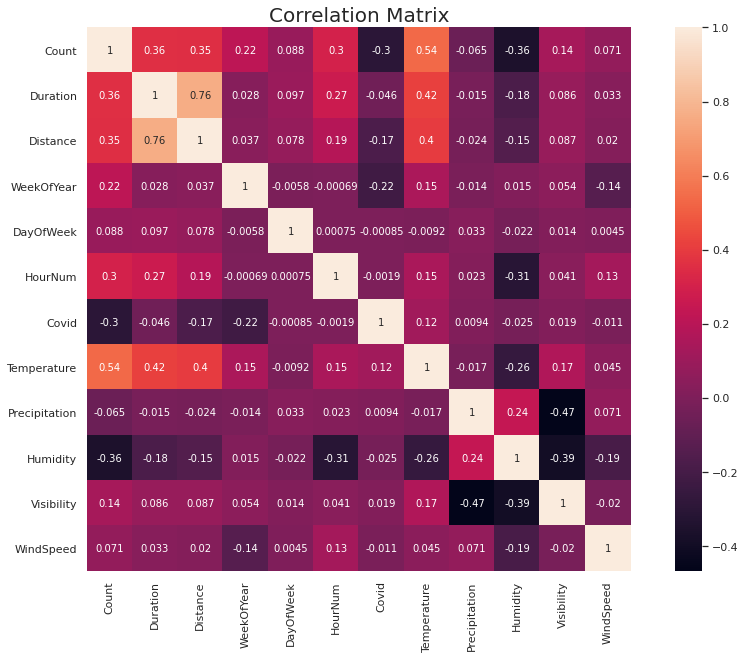

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize = (16,10))
sns.heatmap(corr_matrix, annot = True, square = True).set_title('Correlation Matrix', size = 20)

Text(0.5, 1.0, 'Post-Covid Matrix')

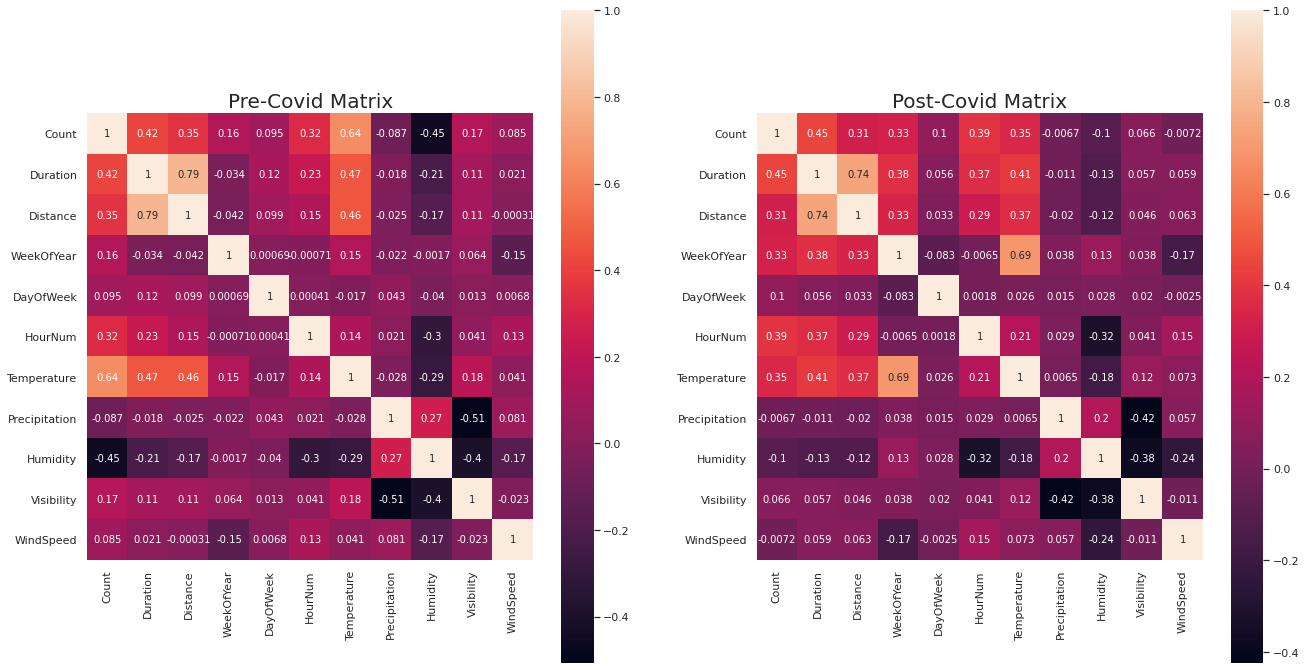

In [ ]:
corr_precovid = df[[col for col in df.columns if 'Covid' not in col]].loc[df.Covid == 0].corr()
corr_postcovid = df[[col for col in df.columns if 'Covid' not in col]].loc[df.Covid == 1].corr()
# Here we create a figure instance, and two subplots
fig, ax = plt.subplots(1, 2, figsize = (22, 12))

# We use ax parameter to tell seaborn which subplot to use for this plot
sns.heatmap(corr_precovid, annot= True, square= True, ax = ax[0]).set_title('Pre-Covid Matrix', size = 20)
sns.heatmap(corr_postcovid, annot= True, square= True, ax = ax[1]).set_title('Post-Covid Matrix', size = 20)

In [ ]:
# check for differences

corr_diff = corr_postcovid - corr_precovid

plt.figure(figsize = (16,10))
sns.heatmap(corr_diff, annot = True, square = True).set_title('Correlation Differences', size = 20)

# Linear Regression

## Seaborn Visualization

In [23]:
pre_covid = df[df.index < "2020-03-21 00:00:00"]

Text(0.5, 1.0, 'Polinomial')

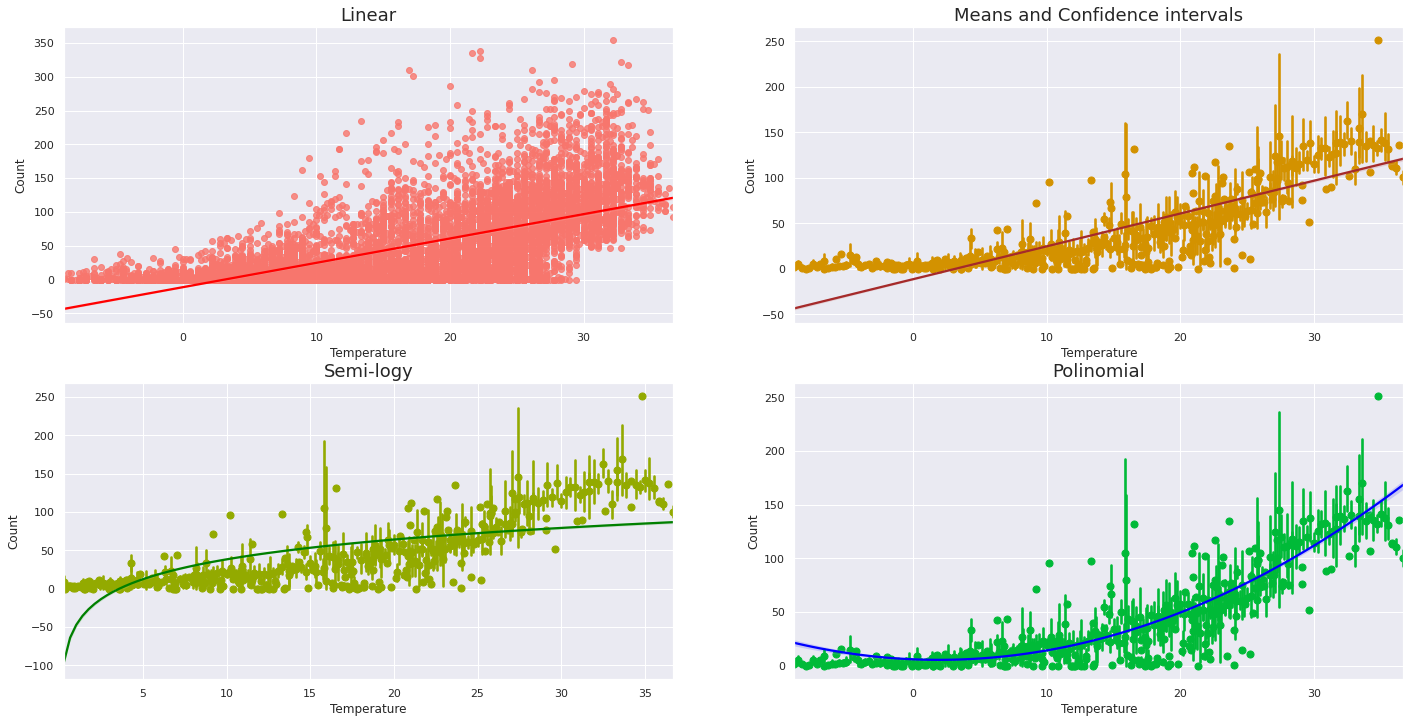

In [33]:
fig, ax = plt.subplots(2, 2, figsize = (24, 12))

sns.regplot(x = "Temperature", y = "Count", data = pre_covid, ax = ax[0][0],
            scatter_kws = {"color" : color_pal[0]},
            line_kws = {"color" : "red"}).set_title('Linear', size = 18)

sns.regplot(x = "Temperature", y = "Count", data = pre_covid, ax = ax[0][1],
            x_estimator = np.mean,
            scatter_kws = {"color" : color_pal[1]},
            line_kws = {"color" : "brown"}).set_title('Means and Confidence intervals', size = 18)

sns.regplot(x = "Temperature", y = "Count", data = pre_covid[pre_covid['Temperature'] > 0],
            x_estimator = np.mean, logx = True, ax = ax[1][0],
            scatter_kws = {"color" : color_pal[2]},
            line_kws = {"color" : "green"}).set_title('Semi-logy', size = 18)

sns.regplot(x = "Temperature", y = "Count", data = pre_covid, ax = ax[1][1],
            scatter_kws = {"color" : color_pal[3]},
            line_kws = {"color" : "blue"},
            x_estimator = np.mean, order = 2).set_title('Polinomial', size = 18)

## Statsmodels

In [ ]:
x = df[df.columns[3:]]
x.head()

,WeekOfYear,DayOfWeek,HourNum,Covid,Temperature,Precipitation,Humidity,Visibility,WindSpeed
Date,,,,,,,,,
2019-04-05 19:00:00,14,4,19,0,15.555556,0.0,72.0,9.97,2.413500
2019-04-05 20:00:00,14,4,20,0,15.555556,0.0,72.0,10.00,0.000000
2019-04-05 21:00:00,14,4,21,0,15.555556,0.0,72.0,10.00,4.827000
2019-04-05 22:00:00,14,4,22,0,15.370370,0.0,73.0,9.98,5.899667
2019-04-05 23:00:00,14,4,23,0,15.000000,0.0,78.0,10.00,0.000000


In [ ]:
x = sm.add_constant(x)
model = sm.OLS(df.Count, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     1302.
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:36:36   Log-Likelihood:                -55594.
No. Observations:               11030   AIC:                         1.112e+05
Df Residuals:                   11020   BIC:                         1.113e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            24.6753      3.958      6.234

In [ ]:
model2 = sm.OLS(df.Duration, x)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     387.7
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:37:05   Log-Likelihood:                -39378.
No. Observations:               11030   AIC:                         7.878e+04
Df Residuals:                   11020   BIC:                         7.885e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0514      0.910      0.057

In [ ]:
model3 = sm.OLS(df.Distance, x)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     385.8
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:37:08   Log-Likelihood:                -90980.
No. Observations:               11030   AIC:                         1.820e+05
Df Residuals:                   11020   BIC:                         1.821e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           323.9354     97.902      3.309